# Partial Least Squares (PLS) Regression
- The principle of partial least squares is similar to PCA regression, i.e. to help with ill-conditioned problems.


- Where PCA regression looks for uncorrelated components as a linear combination of the input variables only, PLS regression looks for linear combinations of the input variables AND tries to maximise the covariance between the input and output variables. 


- This is useful when there are more variables than observations (many columns compared to rows), or collinearity between input variables 

## Exercise: Creating PLS models

In this session we'll try to make a PLS model using the octane dataset.  The principles are the same as what we've done throughout today. We're going to take it in small steps.  Initially don't worry about cross-validation and just try to get some code working with a fixed number of components. We will eventually progress to using cross-validation to work out the best number of components to choose.

### 1) Import the required libraries

PLSRegression is used like the other supervised learning models and is found in:

```
from sklearn.cross_decomposition import PLSRegression
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
```

And don't forget numpy, pandas and matplotlib


In [ ]:
# Install required packages if using jupyterhub
# %pip install -r ../requirements.txt

In [29]:
from sklearn.cross_decomposition import PLSRegression
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###  2) Import the dataset. 

Import the Octane dataset into a dataframe. Use .head() to have a look at it

In [30]:
df = pd.read_csv('../data/Octane.csv')
df.head()

,Sample name,Octane number,1100,1102,1104,1106,1108,1110,1112,1114,...,1532,1534,1536,1538,1540,1542,1544,1546,1548,1550
0,M01,88.6,-0.001835,-0.001496,-0.001009,-0.000360,0.000466,0.001502,0.002798,0.004410,...,0.040192,0.038423,0.036768,0.035235,0.033835,0.032575,0.031462,0.030508,0.029727,0.029127
1,M02,88.8,-0.001627,-0.001261,-0.000748,-0.000065,0.000818,0.001943,0.003354,0.005088,...,0.041009,0.039185,0.037459,0.035842,0.034354,0.033023,0.031876,0.030927,0.030179,0.029622
2,M05,89.4,-0.000465,-0.000330,0.000181,0.001121,0.002465,0.004140,0.006075,0.008238,...,0.044729,0.043308,0.041914,0.040548,0.039222,0.037938,0.036706,0.035545,0.034493,0.033604
3,L06,86.7,-0.001443,-0.001094,-0.000596,0.000082,0.000972,0.002114,0.003545,0.005299,...,0.045022,0.043128,0.041327,0.039629,0.038052,0.036621,0.035361,0.034299,0.033446,0.032808
4,H11,91.2,-0.001607,-0.001155,-0.000548,0.000244,0.001259,0.002551,0.004177,0.006188,...,0.038111,0.036470,0.034925,0.033475,0.032138,0.030943,0.029920,0.029091,0.028468,0.028044


###  3) Train a model

Separate the inputs and the outputs. Then train a model using a small number of components

Use it like this for a given number of components:

```
model = PLSRegression(number_of_components)
model.fit(X_training_data, y_training_data)
```


In [31]:
X = df.iloc[:, 2:].copy()
y = df['Octane number']
model = PLSRegression(5)
model.fit(X, y)

PLSRegression(n_components=5)

### 4) Look at how the model changes as you change the number of components.

i) Check the R-square value of the model

In [32]:
model.score(X, y)

0.9871500977590174

ii) Create a plot of fitted vs true value

Some options: matplotlib's ```plt.plot()``` or seaborn's ```sns.scatterplot()```, or seaborn's ```sns.regplot()```

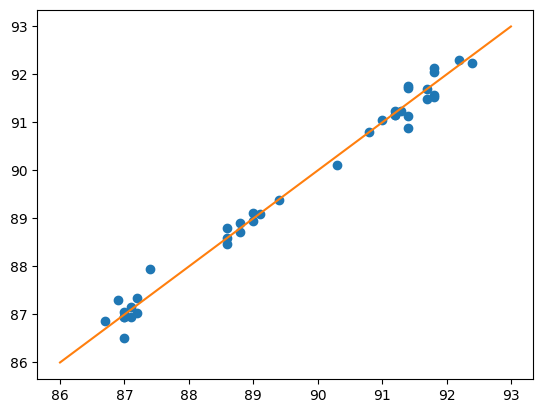

In [33]:
yfit = model.predict(X)
plt.plot(y, yfit, 'o')
plt.plot(np.linspace(86,93,100), np.linspace(86,93,100))

# # Some alternative:
# import seaborn as sns
# sns.regplot(x=y, y=yfit)

# sns.scatterplot(x=y, y=yfit[:,0])
# sns.lineplot(x=np.linspace(86,93,100), y=np.linspace(86,93,100))

iii) Create a score plot like you did in PCA using a loop over number of components. 
     Try between 1 to 20 components.

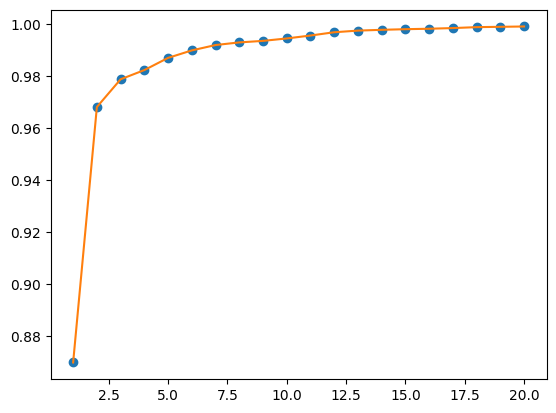

In [34]:
X = df.iloc[:, 2:].copy()
y = df['Octane number']

scores = []
for i in range(1,21):
    model = PLSRegression(i)
    model.fit(X, y)
    scores.append(model.score(X, y))

plt.plot(np.arange(1,21), scores, 'o')
plt.plot(np.arange(1,21), scores)

iv) Find out how to look at the "components", called "loading vectors" in PLS jargon.  

In [35]:
model = PLSRegression(5)
model.fit(X, y)
model.x_loadings_.shape

(226, 5)

In [36]:
model.x_loadings_

array([[ 0.04466598,  0.0164333 , -0.07598413,  0.08874448, -0.16884963],
       [ 0.04065642,  0.01559457, -0.07744622,  0.09064276, -0.16161064],
       [ 0.03613406,  0.01565726, -0.07859098,  0.09462197, -0.15996358],
       ...,
       [-0.04577239,  0.03413982,  0.09118695, -0.01969618, -0.0148835 ],
       [-0.0460359 ,  0.03432075,  0.09108612, -0.01972405, -0.01422961],
       [-0.04627947,  0.03450374,  0.09098996, -0.01975957, -0.01367854]])

v) Plot the component vectors

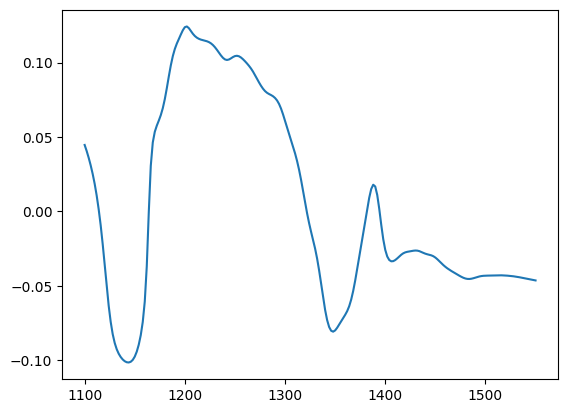

In [37]:
# Plot the wave number against the loadings (this is first component)
plt.plot(df.columns[2:].astype(int), model.x_loadings_[:,0])

vi) (Optional) Plot the observations in the new component space. E.g., plot the observations using component 1 and 2 as the new axes. Try with component 2 and 3. Are there any possible clusters? Hint: See am2_dimreduction notebook for a similar example for PCA. 

In [18]:
observations_in_pls_space = model.transform(X)

In [19]:
X.shape

(39, 226)

In [20]:
observations_in_pls_space.shape

(39, 5)

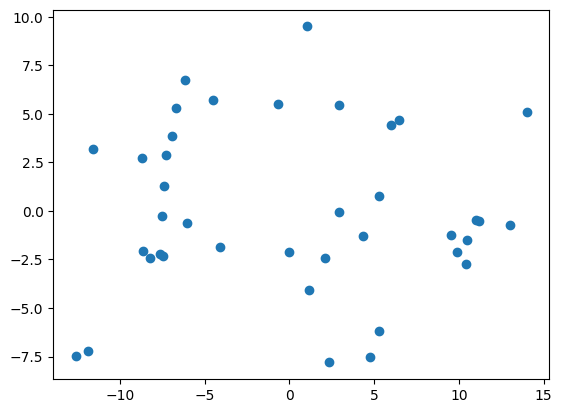

In [21]:
# Component 1 and 2
plt.plot(observations_in_pls_space[:,0], observations_in_pls_space[:, 1], 'o')

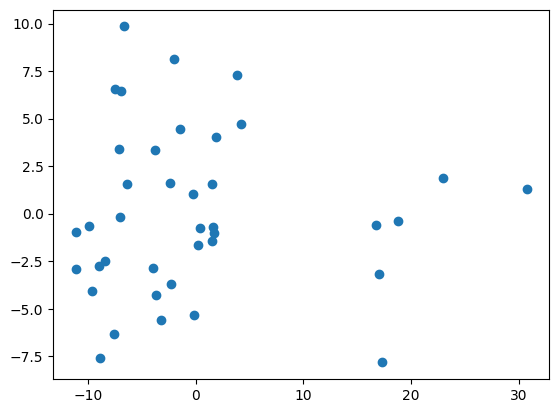

In [22]:
# Possible cluster here
plt.plot(observations_in_pls_space[:,2], observations_in_pls_space[:, 3], 'o')

###  5) Use cross validation to determine the best number of components

You can cross validate in multiple ways.  This may be the simplest:

```
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)
mse = []

for idx in np.arange(1, 21):
    model = PLSRegression(n_components= idx)
    error_score = model_selection.cross_val_score(model, X_training_data,
        y_training_data, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(error_score)
    
#plot the validation curve
plt.plot(np.arange(1, 21), np.array(mse), '-v')
plt.xlabel('Number of components for 10-fold CV')
plt.ylabel('MSE')
plt.title ('PLS Cross-validation')
```


Text(0.5, 1.0, 'PLS Cross-validation')

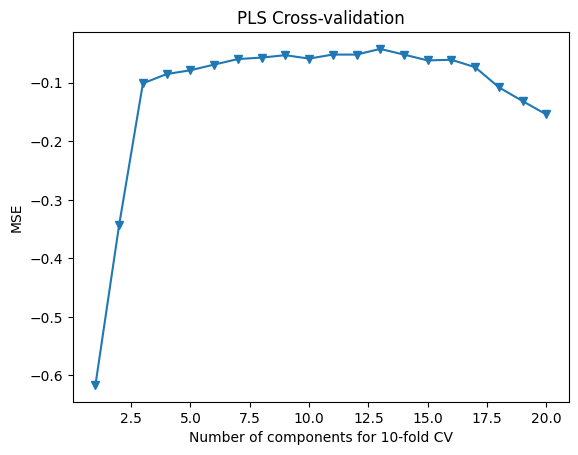

In [26]:
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)
mse = []

for idx in np.arange(1, 21):
    model = PLSRegression(n_components= idx)
    error_score = model_selection.cross_val_score(model, X,
        y, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(error_score)

#plot the validation curve
plt.plot(np.arange(1, 21), np.array(mse), '-v')
plt.xlabel('Number of components for 10-fold CV')
plt.ylabel('MSE')
plt.title ('PLS Cross-validation')

In [27]:
# What is the component with the least error? 
np.arange(1, 21)[np.argmax(np.array(mse))]

13